In [155]:
import sys
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
import dataframe_image as dfi
import pandas as pd
dt = pd.to_datetime
try:
    importlib.reload(sys.modules['experiments'])
except Exception as e:
    print(e)
from experiments import *


In [4]:
universe = prepare_universe()
highbm = universe[universe.bm_quintile==4]
bulls, bears = classify_bulls_and_bears()


In [89]:
ports = compute_bull_bear_portfolios(highbm.query('symbol != "VIAC"'), bulls, bears)

p0 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p1 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p2 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p3 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p4 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p5 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p6 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p7 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p8 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p9 1980 actual earnings report year used 1981
1980 0 cannot run experiment
plo 1980 actual earnings report year used 1981
1980 0 cannot run experiment
phi 1980 actual earnings report year used 1981
1980 0 cannot run experiment
all 1980 actual earnings report year used 1981
1980 0 cannot run experiment
p0 1987 actual earning

p0 1982 actual earnings report year used 1986
1982 0 cannot run experiment
p1 1982 actual earnings report year used 1986
1982 0 cannot run experiment
p2 1982 actual earnings report year used 1986
1982 0 cannot run experiment
p3 1982 actual earnings report year used 1985
1982-08-12 1987-08-25 filter= p3 pfolio_size 3 pool size 3
p4 1982 actual earnings report year used 1985
1982-08-12 1987-08-25 filter= p4 pfolio_size 3 pool size 3
p5 1982 actual earnings report year used 1985
1982-08-12 1987-08-25 filter= p5 pfolio_size 1 pool size 1
p6 1982 actual earnings report year used 1986
1982-08-12 1987-08-25 filter= p6 pfolio_size 1 pool size 1
p7 1982 actual earnings report year used 1984
1982-08-12 1987-08-25 filter= p7 pfolio_size 1 pool size 1
p8 1982 actual earnings report year used 1986
1982 0 cannot run experiment
p9 1982 actual earnings report year used 1986
1982 0 cannot run experiment
plo 1982 actual earnings report year used 1986
1982 0 cannot run experiment
phi 1982 actual earnings

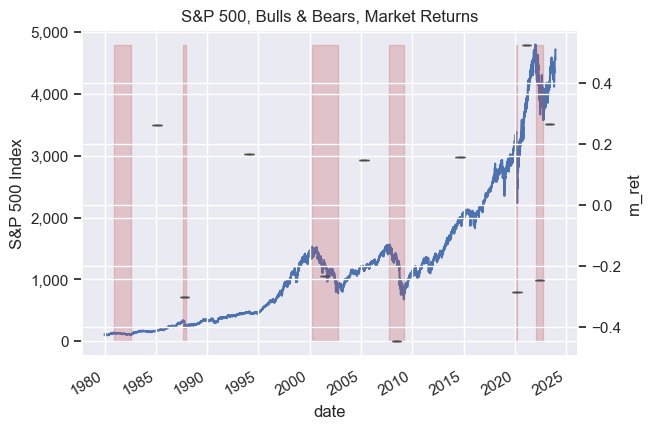

In [60]:
midpoint = pd.to_datetime(ports.start) + ((pd.to_datetime(ports.end) - pd.to_datetime(ports.start))/2)
p2 = ports.set_index(midpoint).query('group == "all"')
market_plot(bears)
plt.title('S&P 500, Bulls & Bears, Market Returns')
ax2 = plt.twinx()
fig = sns.boxplot(data=p2, x=p2.index, y="m_ret", ax=ax2, native_scale=True, width=1, fliersize=0)#, col='group')

## Demonstrate Non-lookahead (lagging) bull bear classification confounds problem with separate problem of regime classification

In [7]:
bulls1, bears1 = classify_bulls_and_bears_nonlookahead()
display(bears1)
display(bulls1)

,min,max
bearn,,
0,1982-02-22,1982-09-14
1,1987-10-19,1988-03-08
2,2001-03-12,2001-12-05
3,2002-07-10,2002-08-22
4,2008-07-09,2008-12-08
5,2009-02-23,2009-03-25
6,2020-03-12,2020-04-13
7,2022-06-13,2023-06-08


,min,max
bearn,,
0,1980-01-02,1982-02-22
1,1982-09-15,1987-10-19
2,1988-03-09,2001-03-12
3,2001-12-06,2002-07-10
4,2002-08-23,2008-07-09
5,2008-12-09,2009-02-23
6,2009-03-26,2020-03-12
7,2020-04-14,2022-06-13
8,2023-06-09,2023-12-15


In [41]:
ports1 = compute_bull_bear_portfolios(highbm.query('symbol != "VIAC"'), bulls1, bears1)

1987 0 cannot run experiment
1987 0 cannot run experiment
1987-10-19 1988-03-08 filter= all pfolio_size 5 pool size 5
1988 0 cannot run experiment
1988 0 cannot run experiment
1988-03-09 2001-03-12 filter= all pfolio_size 10 pool size 16
1988 0 cannot run experiment
2001-03-12 2001-12-05 filter= plo pfolio_size 8 pool size 8
2001-03-12 2001-12-05 filter= phi pfolio_size 10 pool size 20
2001-03-12 2001-12-05 filter= all pfolio_size 10 pool size 349


KeyboardInterrupt: 

,start,end,market,group,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret,|P|
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.11,1.0,0.05,1.0,-0.11,-7.03e-03,0.02,0.04,0.1,0.11,0.12,-0.08,0.0,-0.05,0.0,0.19,5
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.11,1.0,0.05,1.0,-0.11,-7.03e-03,0.02,0.04,0.1,0.11,0.12,-0.08,0.0,-0.05,0.0,0.19,5
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.11,1.0,0.05,1.0,-0.11,-7.03e-03,0.02,0.04,0.1,0.11,0.12,-0.08,0.0,-0.05,0.0,0.19,5
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.11,1.0,0.05,1.0,-0.11,-7.03e-03,0.02,0.04,0.1,0.11,0.12,-0.08,0.0,-0.05,0.0,0.19,5
1987-12-28 12:00:00,1987-10-19,1988-03-08,bear,all,0.11,1.0,0.05,1.0,-0.11,-7.03e-03,0.02,0.04,0.1,0.11,0.12,-0.08,0.0,-0.05,0.0,0.19,5


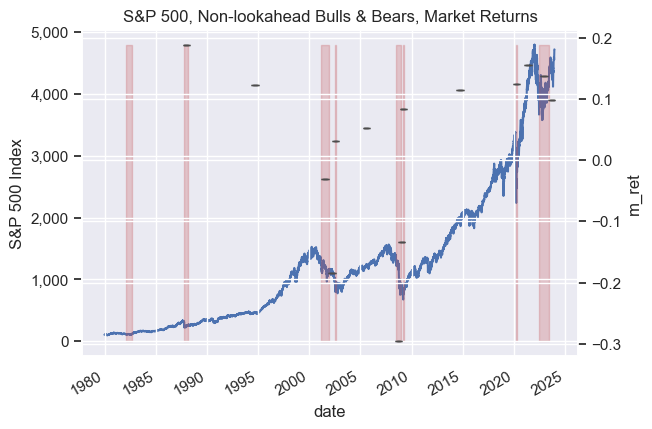

In [61]:
midpoint = dt(ports1.start) + ((dt(ports1.end) - dt(ports1.start))/2)
p2_2 = ports1.set_index(midpoint).query('group == "all"')
display(p2_2.head())
market_plot(bears1)
plt.title('S&P 500, Non-lookahead Bulls & Bears, Market Returns')
ax2 = plt.twinx()
fig = sns.boxplot(data=p2_2, x=p2_2.index, y="m_ret", ax=ax2, native_scale=True, width=5, fliersize=0)

## Back to original market regime classification

In [129]:
ports['covid_era'] = dt(ports.start) > dt('2018-01-01')
ports['midpoint'] = (dt(ports.start) + ((dt(ports.end) - dt(ports.start))/2))
# melt for sns
ports2 = pd.melt(ports, id_vars=['start', 'end', 'midpoint', 'market', 'group', 'covid_era', ], \
                 value_vars=['raw_ret', 'ma_ret', 'm_ret'], var_name='return_type')
# compute outliers
ports2 = identify_outliers(ports2, m=3)
ports2.head()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['mve_quintile']"

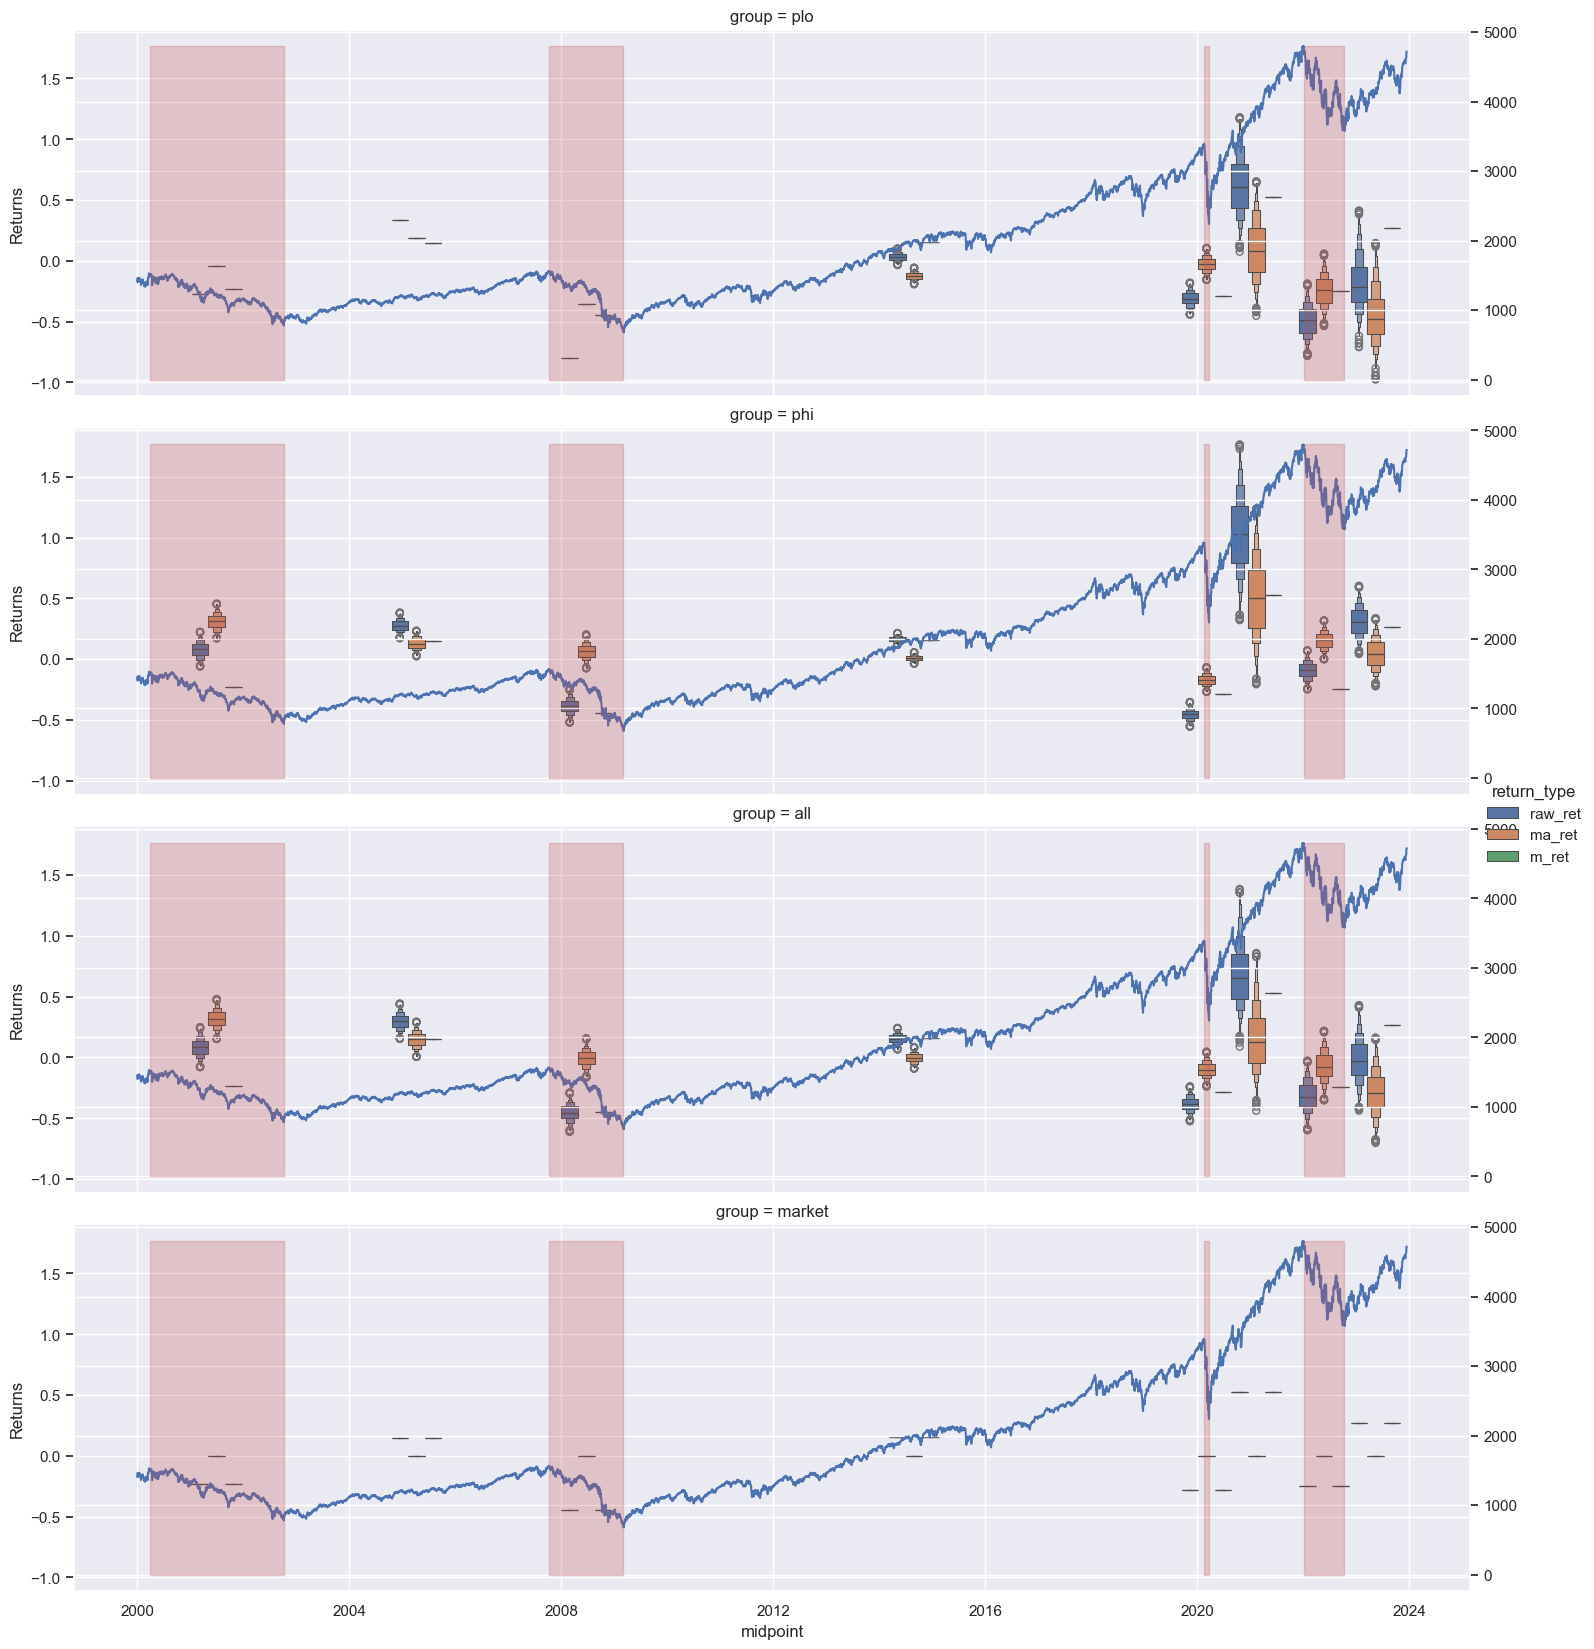

In [159]:
first_time_to_plot = pd.to_datetime('2000-01-01')
g = sns.catplot(data=
                ports2[(ports2.outlier == False)
                       & ports2.group.isin(['market', 'all', 'phi', 'plo'])
                        & (dt(ports2.start) > first_time_to_plot)],
            x='midpoint', 
            y="value", 
            native_scale=True, 
            width=1, 
            row='group', 
            kind='boxen',
            hue='return_type',
            zorder=1,
            height = 5,
            aspect = 3,
            #showfliers = False,
               )
df = get_hist(MARKET_TICKER)[['adjClose']]

for group, ax in g.axes_dict.items():
    ax.set(ylabel='Returns')
    plt.setp(ax.lines, zorder=1)
    plt.setp(ax.collections, zorder=1, label="")
    ax2 = ax.twinx()
    plt.sca(ax2)
    plt.setp(ax2.lines, zorder=2)
    plt.setp(ax2.collections, zorder=2, label="")
    no_label_market_plot(bears[bears['min'] > first_time_to_plot], df[df.index > first_time_to_plot], z=2)
plt.show()

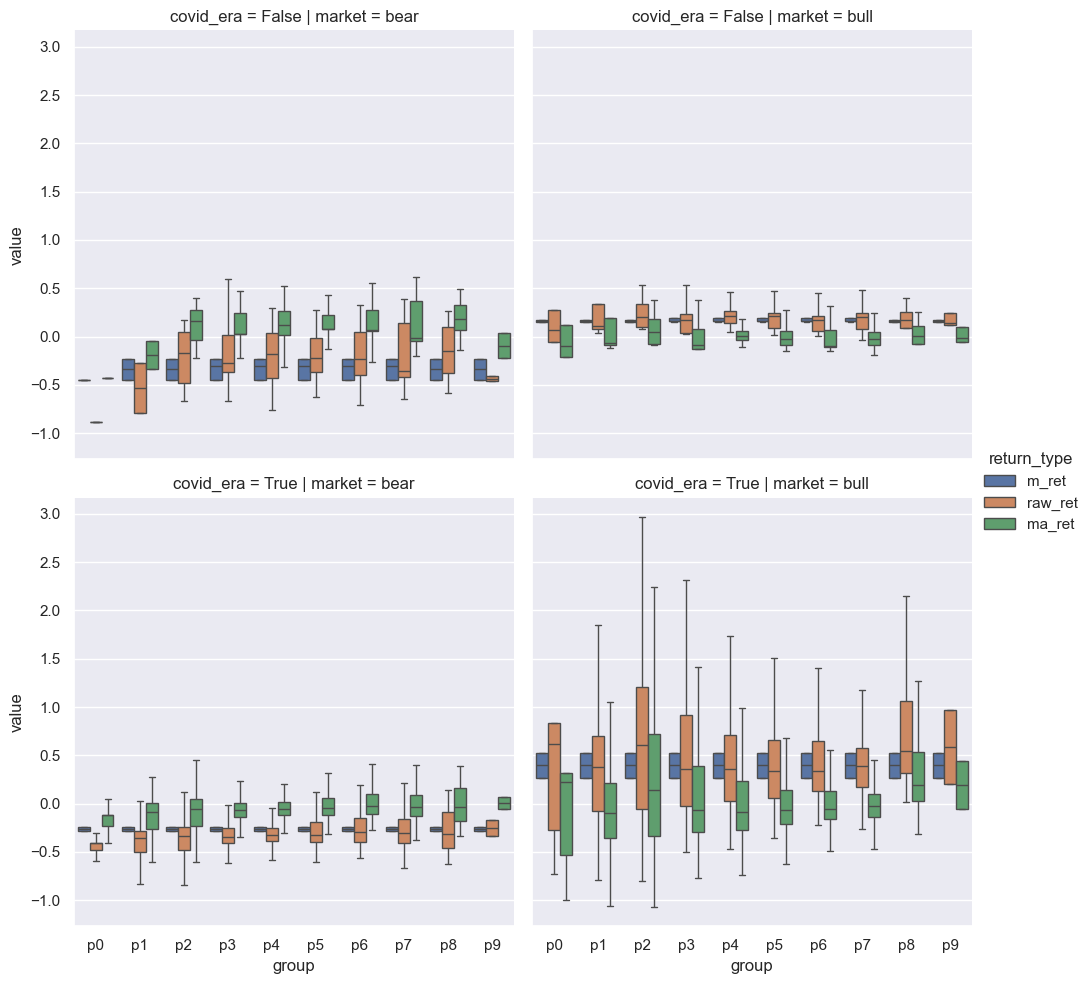

In [120]:
sort_rule = {f'p{i}': i for i in range(10)}
sns.set(rc={'figure.figsize':(8.27, 5)})
p = sns.catplot(
    data=ports2[ports2.group.isin([f'p{i}' for i in range(10)])]
    .sort_values(by=['market'])
    .sort_values(by=['group'], key=lambda series: series.apply(lambda x: sort_rule[x])),
    y="value", hue='return_type', x='group',kind="box",
    showfliers = False,
    col='market',
    row='covid_era',
)
plt.show()

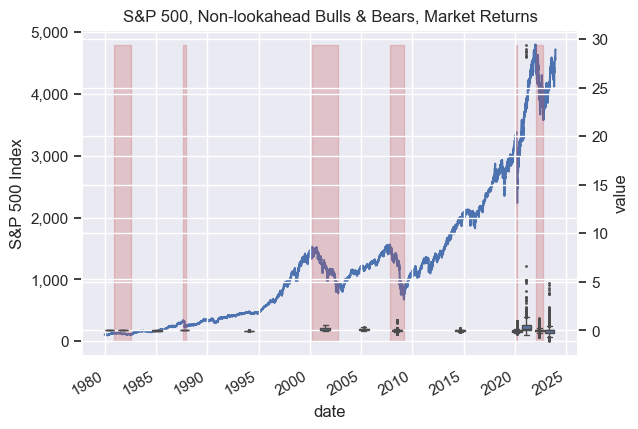

In [68]:
# plt = market_plot(bears)
# plt.title('S&P 500, Non-lookahead Bulls & Bears, Market Returns')
# ax2 = plt.twinx()
# fig = sns.boxplot(data=ports2[ports2.return_type == 'ma_ret']#.query('outlier == False')
#                   , x='midpoint', 
#                   y="value", ax=ax2, native_scale=True, 
#                   width=1, fliersize=1)

[Text(0, 0.5, 'Market Adjusted Return')]

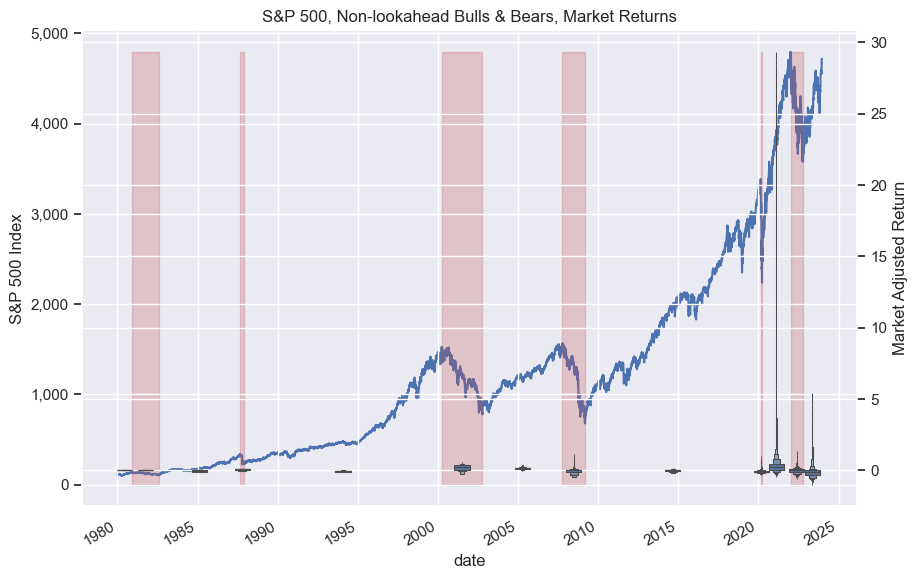

In [121]:
# #fig, ax = plt.subplots(figsize=[10,5])
# fig = plt.figure(figsize=(10,7))
# market_plot(bears)
# plt.title('S&P 500, Non-lookahead Bulls & Bears, Market Returns')
# df = get_hist(MARKET_TICKER)[['adjClose']]
# ax2 = plt.twinx()
# sns.boxenplot(data=
#         ports2[ports2.return_type == 'ma_ret']#.query('outlier == False')
#         , x='midpoint', 
#         y="value",
#         #hue='return_type',
#         ax=ax2, 
#         native_scale=True, 
#         showfliers=False,
#         #height=5, 
#         #aspect=3,
#         width=1,
#                  )
# ax2.set(ylabel='Market Adjusted Return')

# # plot means
# # means = ports2.groupby(['midpoint', 'return_type'])[['value']].mean().reset_index()
# # ax = sns.stripplot(data=means[means.return_type == 'ma_ret'],
# #                    x="midpoint",  
# #                    #hue="return_type",
# #                    y="value", 
# #                    zorder=10,  color='C0', linewidth=1,
# #                    jitter=False,
# #                    native_scale=True,
                   
# #                    ax=ax2,
# #                    edgecolor='lightgray')

[Text(0, 0.5, 'Market Adjusted Return')]

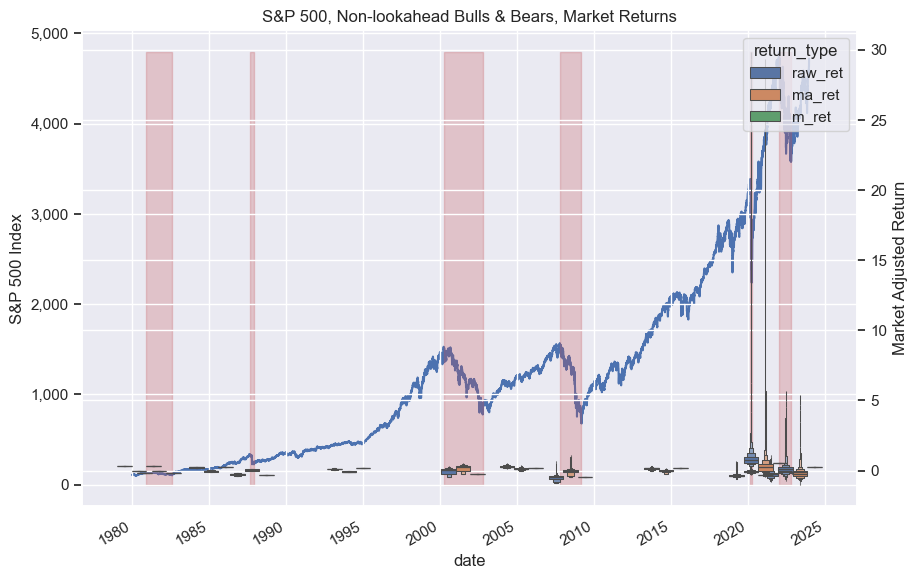

In [122]:
# #fig, ax = plt.subplots(figsize=[10,5])
# fig = plt.figure(figsize=(10,7))
# market_plot(bears)
# plt.title('S&P 500, Non-lookahead Bulls & Bears, Market Returns')
# df = get_hist(MARKET_TICKER)[['adjClose']]
# ax2 = plt.twinx()
# sns.boxenplot(data=
#         ports2#[ports2.return_type == 'ma_ret']#.query('outlier == False')
#         , x='midpoint', 
#         y="value",
#         hue='return_type',
#         ax=ax2, 
#         native_scale=True, 
#         showfliers=False,
#         #height=5, 
#         #aspect=3,
#         width=3,
#                  )
# ax2.set(ylabel='Market Adjusted Return')

# # plot means
# # means = ports2.groupby(['midpoint', 'return_type'])[['value']].mean().reset_index()
# # ax = sns.stripplot(data=means[means.return_type == 'ma_ret'],
# #                    x="midpoint",  
# #                    #hue="return_type",
# #                    y="value", 
# #                    zorder=10,  color='C0', linewidth=1,
# #                    jitter=False,
# #                    native_scale=True,
                   
# #                    ax=ax2,
# #                    edgecolor='lightgray')

In [ ]:
# sns.displot(
#     ports2[ports2["return type"] != "m_ret"], x="value", hue='market', col="return type", row='group',
#     facet_kws=dict(margin_titles=True),
# )


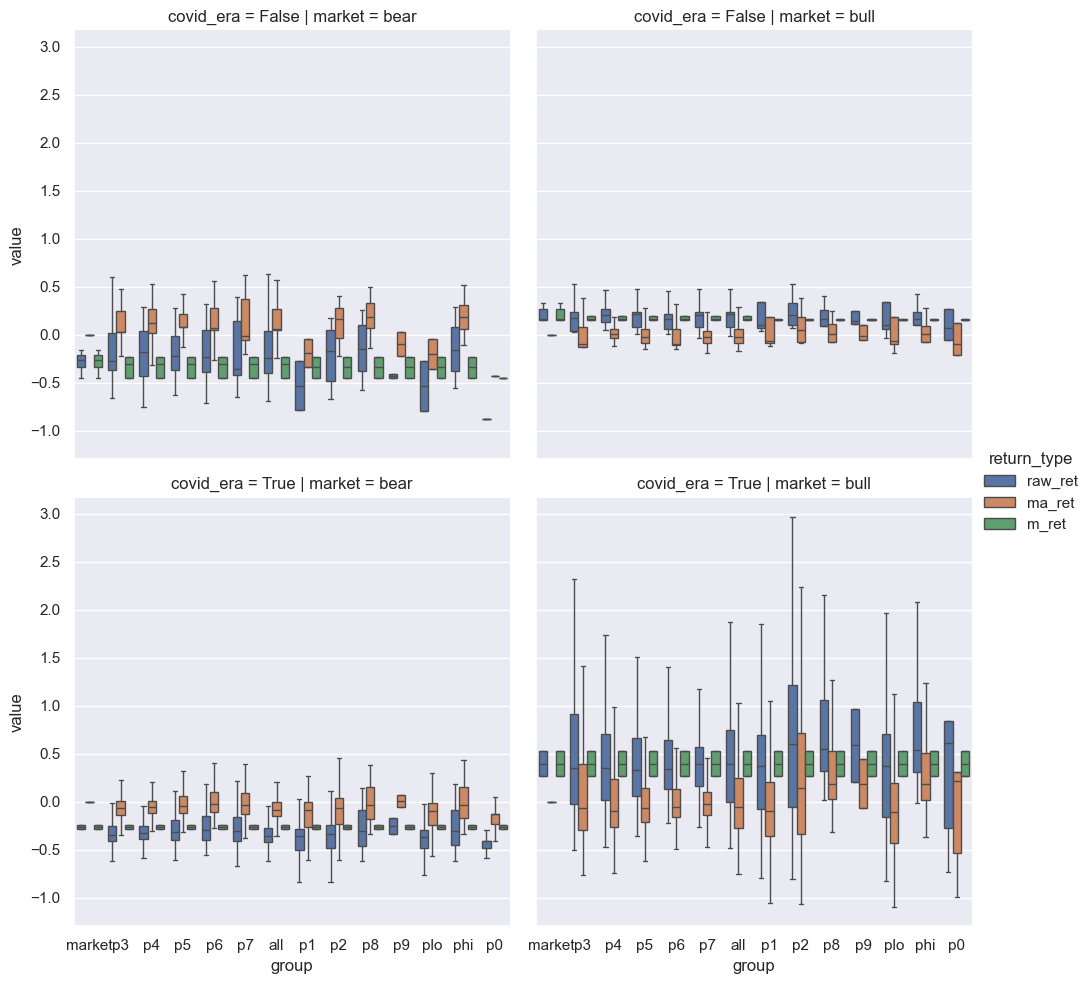

In [123]:
# sns.set(rc={'figure.figsize':(8.27, 5)})

# p = sns.catplot(
#     ports2, y="value", hue='return_type', x='group',kind="box",
#     showfliers = False,
#     col='market',
#     row = 'covid_era'
# )
# plt.show()

In [125]:
# caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
# display(
#     pd.pivot_table(
#         data=ports,
#         values=['raw_ret', 'ma_ret'],
#         index=['group', 'market'], 
#         #aggfunc=['mean', p25, p50, p75, pos],
#         aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
#         #margins=True
#     )
#     .reorder_levels([1, 0], axis=1)
#     .sort_index(axis=1)
#     .style
#     .set_caption(caption)
#     .set_table_styles(styles).format('{:.2f}')
# )

caption = "One-Year Raw Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
# display(
#     pd.pivot_table(
#         data=ports2,
#         columns=['return type', 'market'],
#         values=['value'],
#         index=['group'], 
#         #aggfunc=['mean', p25, p50, p75, pos],
#         aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
#         margins=True
#     )
# #     .reorder_levels([2, 1, 0], axis=1)
# #     .sort_index(axis=1)
#     .style
#     .set_caption(caption)
#     .set_table_styles(styles).format('{:.2f}')
# )
d = (pd.pivot_table(
        data=ports[ports.group.isin(['market', 'all', 'phi', 'plo'])],
        columns=['market'],
        values=['raw_ret'],#, 'ma_ret'],
        index=['covid_era', 'group', ], 
        #aggfunc=['mean', p25, p50, p75, pos],
        aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
        margins=True
    )
#     .reorder_levels([0, 1, 0], axis=1)
#     .sort_index(axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)
dfi.export(d,"port_raw.png",max_cols=-1)
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"

d = (pd.pivot_table(
        data=ports[ports.group.isin(['market', 'all', 'phi', 'plo'])],
        columns=['market'],
        values=['ma_ret'],#, 'ma_ret'],
        index=['covid_era', 'group', ], 
        #aggfunc=['mean', p25, p50, p75, pos],
        aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
        margins=True
    )
#     .reorder_levels([0, 1, 0], axis=1)
#     .sort_index(axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)

dfi.export(d,"port_ma.png",max_cols=-1)

In [167]:
indiv = augment_individual_stock_bull_bear(highbm, bulls, bears)
# reshape so returns are in separate rows for seaborn
indiv['covid_era'] = pd.to_datetime(indiv.start) > pd.to_datetime('2018-01-01')
indiv2 = pd.melt(indiv, id_vars=['start', 'end', 'market', 'pscore', 'symbol', 'mve_quintile', 'price_quintile', 'pscore_group', 'covid_era'], value_vars=['raw_ret', 'ma_ret', 'm_ret'], var_name='return_type')


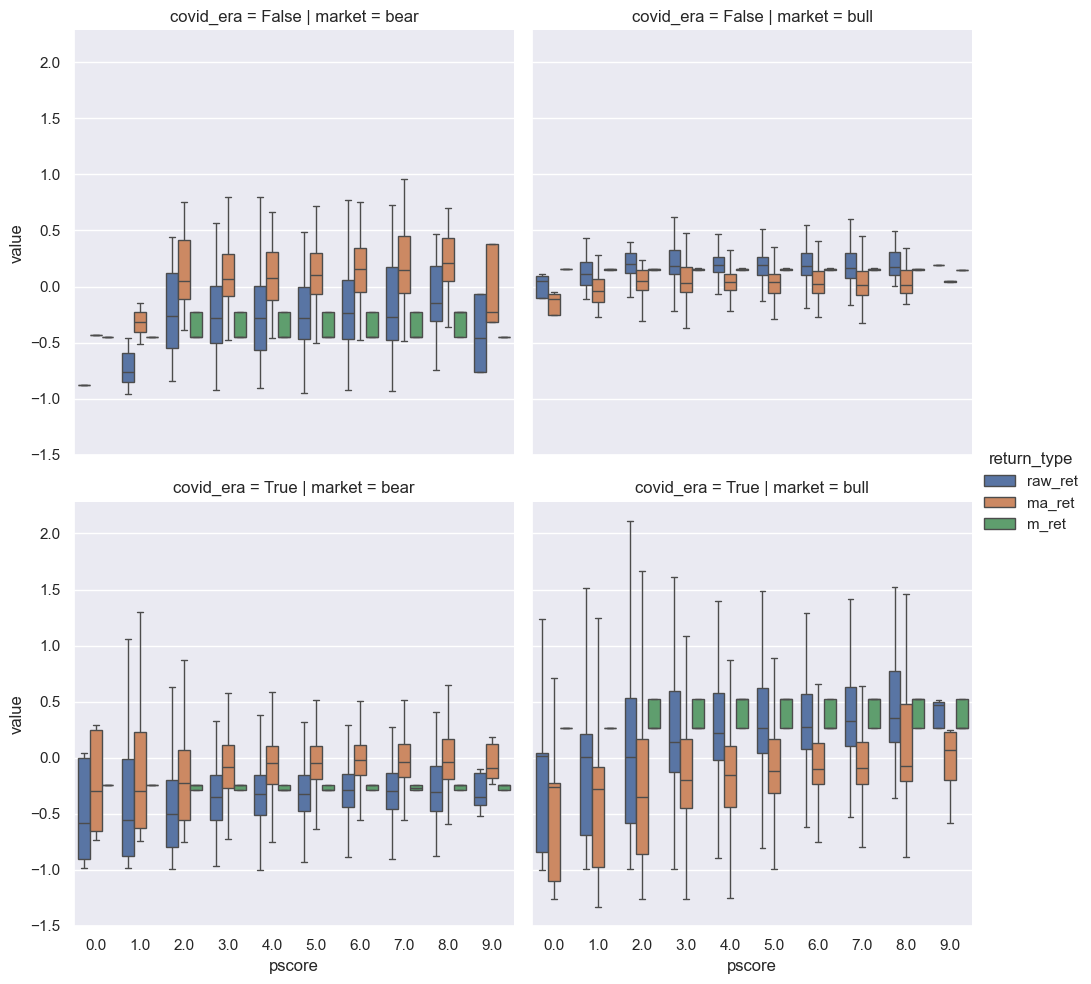

In [133]:
sns.set(rc={'figure.figsize':(8.27, 5)})
p = sns.catplot(
    indiv2, y="value", hue='return_type', x='pscore',kind="box",
    showfliers = False,
    col='market',
    row='covid_era',
)
plt.show()

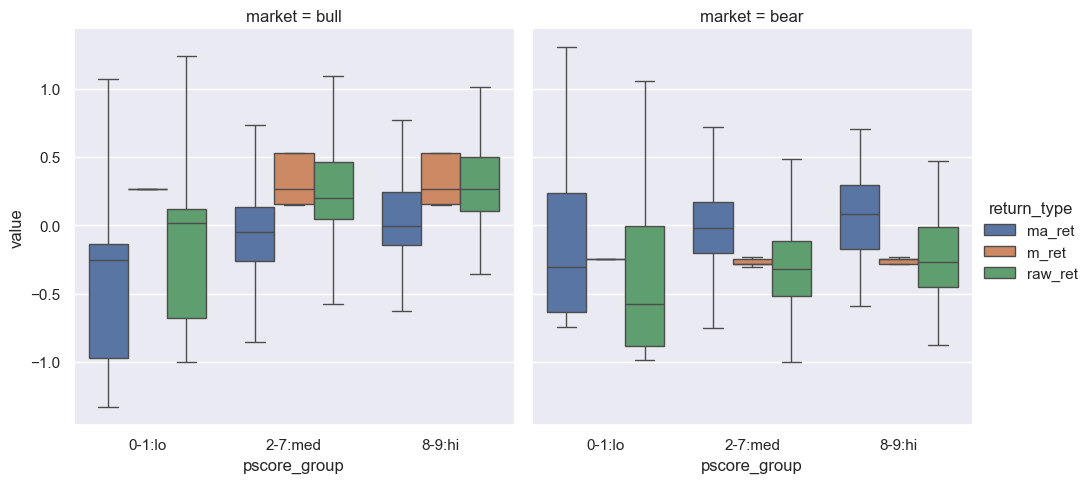

In [134]:

sns.set(rc={'figure.figsize':(8.27, 5)})
p = sns.catplot(
    indiv2.sort_values(by=['pscore_group']), y="value", hue='return_type', x='pscore_group',kind="box",
    log_scale=False,
    showfliers = False,
col='market'
)
plt.show()


# while the firm might still be considered distressed, fundamental signals may be showing signs of recovery..
# piotroski score measures market overreaction to poor firm performance by identifying uptrends in fundamental signals.
# 
# OBSERVATIONS
# DURING BULL MARKET, THE MEDIAN MARKET ADJUSTED RETURN IS NEGATIVE MEANING THE HIGH PSCORE HIGH BM STRATEGY
# UNDERPERFORMS THE OVERALL MARKET.
# ON THE OTHER HAND, DURING A BEAR MARKET, THE HIGH PSCORE STRATEGY MARKET ADJUSTED RETURNS OUTPERFORMS THE MARKET.
# in a bull market, its not ss whether you invest in high market value of equity stocks. However IN A BEAR MARKET,
# HIGH MVE STOCKS OUTPERFORM LOW AND MID MVE STOCKS
# update after fixing i_shares
# THE MEDIAN MARKET ADJUSTED RETURN IS POSITIVE DURING ABULL MARKET MEANING THE HIGH PSCORE BM STRATEGY OUTPERFORMS THE
# OVERALL MARKET.
# DURING A BEAR MARKET, THE HIGH PSCORE HIGH BM STRATEGY STILL OUTPERFORMS THE MARKET BUT WITH MORE VARIATION
#
# while the ma-mean during a bull market is still positive, the median is negative and VaR (p5) is worse.
# thus a VaR strategy would be to switch to adaptive. 
# Adaptive VaR: 

# one criticism of this approach is the market classification uses hindsight.

# Partitioned by Market Value of Equity

In [172]:

caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-score <br>"
           "Partitioned by Market Value of Equity")
d = (pd.pivot_table(
    data=indiv2.query('return_type == "ma_ret"'), 
    index=['market', 'pscore_group',], 
    columns=['mve_quintile'], 
    aggfunc=['mean', p10, p25, p50, p75, p90, pos, ], 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
display(d)
dfi.export(d,"bulls_bears_ma_mve.png",max_cols=-1)

# Partitioned by Price

In [173]:

caption = ("One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-score <br>"
           "Partitioned by Share Price")
d = (
    pd.pivot_table(
    data=indiv2.query('return_type == "ma_ret"'), 
    index=['market', 'pscore_group',], 
    columns=['price_quintile'], 
    aggfunc=['mean', p10, p25, p50, p75, p90, pos, ], 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

display(d)
dfi.export(d,"bulls_bears_ma_price.png",max_cols=-1)

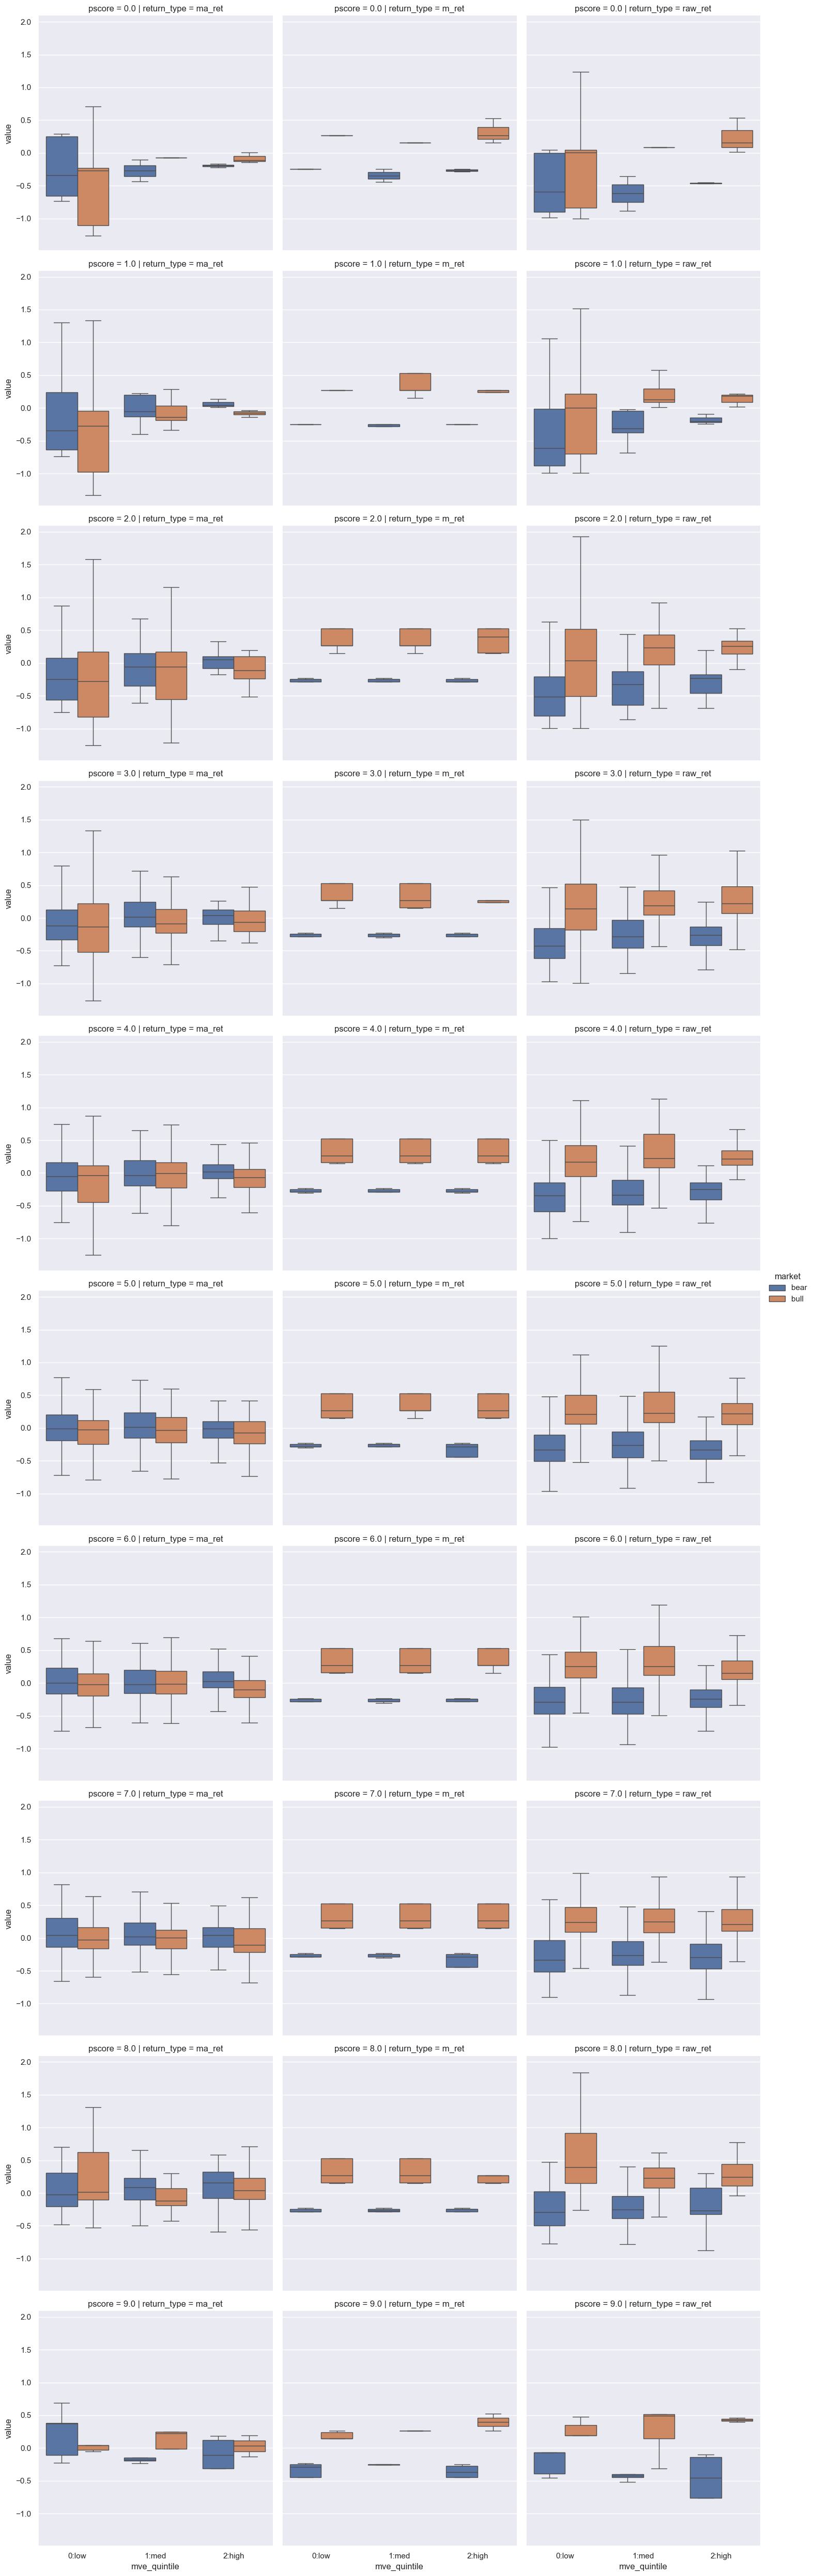

In [137]:

sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    indiv2.sort_values(by=['mve_quintile']), y="value", hue='market', x='mve_quintile',kind="box",
    col='return_type',
    row='pscore',
    showfliers = False,
)
plt.show()


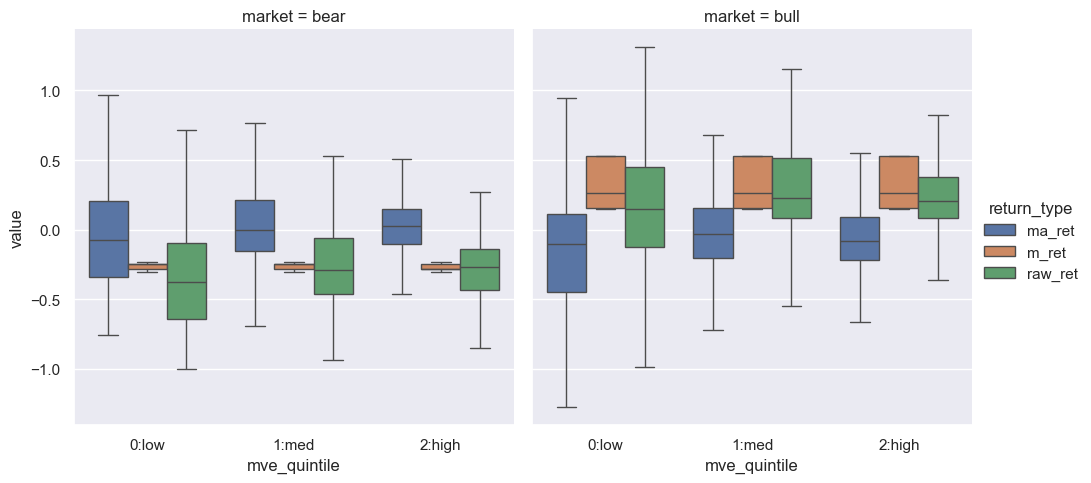

In [136]:

sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    indiv2.sort_values(by=['mve_quintile']), y="value", hue='return_type', x='mve_quintile',kind="box",
    log_scale=False,
    showfliers = False,
col='market'
)
plt.show()


In [138]:

caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score"
display(
    pd.pivot_table(
    data=indiv2, 
    index=['return_type','pscore',], 
    columns=['market'], 
    aggfunc=['mean', p5, p10, p25, p50, p75, p90, pos, ES, MS], 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

In [160]:

caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by F-Score group"
func_lst = ['mean',
            p5, 
            p10, 
            p25, 
            p50, 
            p75, 
            p90, 
            pos, 
            ES, 
            MS]
display(
    pd.pivot_table(
    data=indiv2, 
    index=['return_type','pscore_group',], 
    columns=['market'], 
    aggfunc=func_lst, 
    values='value',
#         margins=True
    )
#     .reorder_levels([1, 0], axis=1)
#     .sort_index(axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
# bear market has more ma-%positive than bull market